In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Generate realistic sample data based on typical ETF characteristics
np.random.seed(42)

# Create date range
dates = pd.date_range(start='2019-01-01', end='2024-01-01', freq='B')  # Business days

# Starting prices (approximate real values)
start_prices = {
    'SPY': 250,
    'QQQ': 160, 
    'IWM': 140,
    'EFA': 60,
    'TLT': 120,
    'GLD': 120
}

# Annual returns and volatilities (realistic estimates)
params = {
    'SPY': {'mu': 0.12, 'sigma': 0.18},   # S&P 500
    'QQQ': {'mu': 0.15, 'sigma': 0.22},   # Nasdaq
    'IWM': {'mu': 0.10, 'sigma': 0.24},   # Small cap
    'EFA': {'mu': 0.08, 'sigma': 0.20},   # International
    'TLT': {'mu': 0.02, 'sigma': 0.12},   # Bonds
    'GLD': {'mu': 0.05, 'sigma': 0.16}    # Gold
}

# Generate price series
data = pd.DataFrame(index=dates)
for ticker in ['SPY', 'QQQ', 'IWM', 'EFA', 'TLT', 'GLD']:
    mu = params[ticker]['mu'] / 252  # Daily return
    sigma = params[ticker]['sigma'] / np.sqrt(252)  # Daily vol
    
    returns = np.random.normal(mu, sigma, len(dates))
    prices = start_prices[ticker] * np.exp(np.cumsum(returns))
    data[ticker] = prices

print(f"Data shape: {data.shape}")
print(f"Date range: {data.index[0]} to {data.index[-1]}")
print("\nFirst few rows:")
data.head()

Data shape: (1305, 6)
Date range: 2019-01-01 00:00:00 to 2024-01-01 00:00:00

First few rows:


,SPY,QQQ,IWM,EFA,TLT,GLD
2019-01-01,251.531773,158.114184,141.441943,59.949641,121.639620,120.366718
2019-01-02,251.257356,158.270129,139.085099,59.902651,121.661644,119.979577
2019-01-03,253.229964,158.344353,138.717089,60.337054,121.464667,119.953398
2019-01-04,257.763823,160.841024,138.758465,61.082636,120.624422,120.000903
2019-01-07,257.202804,161.999036,140.075912,61.056309,123.340969,119.057902


In [3]:
# Calculate daily returns
returns = data.pct_change().dropna()

print(f"Returns shape: {returns.shape}")
print(f"\nDaily returns (first 5 days):")
print(returns.head())

print(f"\nAverage daily return (%):")
print((returns.mean() * 100).round(3))

print(f"\nDaily volatility (%):")
print((returns.std() * 100).round(3))

Returns shape: (1304, 6)

Daily returns (first 5 days):
                 SPY       QQQ       IWM       EFA       TLT       GLD
2019-01-02 -0.001091  0.000986 -0.016663 -0.000784  0.000181 -0.003216
2019-01-03  0.007851  0.000469 -0.002646  0.007252 -0.001619 -0.000218
2019-01-04  0.017904  0.015767  0.000298  0.012357 -0.006918  0.000396
2019-01-07 -0.002176  0.007200  0.009495 -0.000431  0.022521 -0.007858
2019-01-08 -0.002176  0.000248  0.010557  0.023978 -0.008002  0.006052

Average daily return (%):
SPY    0.097
QQQ    0.106
IWM    0.033
EFA    0.000
TLT   -0.023
GLD    0.010
dtype: float64

Daily volatility (%):
SPY    1.122
QQQ    1.371
IWM    1.526
EFA    1.251
TLT    0.764
GLD    1.056
dtype: float64


<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

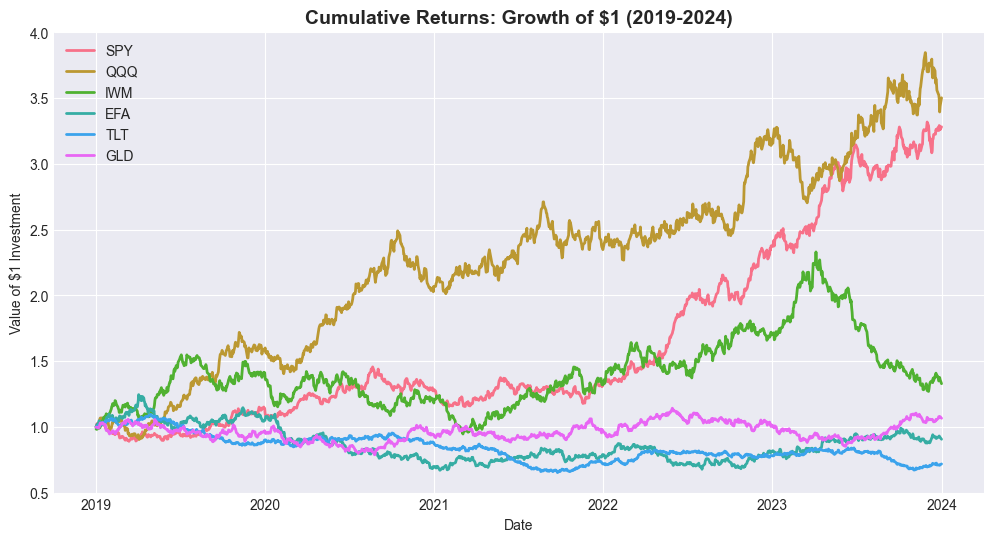

In [4]:
# Calculate cumulative returns (growth of $1)
cumulative_returns = (1 + returns).cumprod()

# Plot
plt.figure(figsize=(12, 6))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker, linewidth=2)

plt.title('Cumulative Returns: Growth of $1 (2019-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Value of $1 Investment')
plt.legend(loc='best')
plt.grid

In [5]:
# Calculate annualized mean returns
mean_returns = returns.mean() * 252  # 252 trading days per year

# Calculate annualized covariance matrix
cov_matrix = returns.cov() * 252

print("Annualized Expected Returns:")
print((mean_returns * 100).round(2))
print("\n" + "="*50)
print("\nCovariance Matrix (annualized):")
print(cov_matrix.round(4))
print("\n" + "="*50)
print("\nCorrelation Matrix:")
print(returns.corr().round(2))

Annualized Expected Returns:
SPY    24.56
QQQ    26.60
IWM     8.42
EFA     0.05
TLT    -5.68
GLD     2.62
dtype: float64


Covariance Matrix (annualized):
        SPY     QQQ     IWM     EFA     TLT     GLD
SPY  0.0317 -0.0001  0.0002  0.0001  0.0007  0.0002
QQQ -0.0001  0.0474  0.0018 -0.0003 -0.0004 -0.0009
IWM  0.0002  0.0018  0.0587 -0.0012 -0.0014  0.0010
EFA  0.0001 -0.0003 -0.0012  0.0394  0.0002 -0.0002
TLT  0.0007 -0.0004 -0.0014  0.0002  0.0147 -0.0007
GLD  0.0002 -0.0009  0.0010 -0.0002 -0.0007  0.0281


Correlation Matrix:
      SPY   QQQ   IWM   EFA   TLT   GLD
SPY  1.00 -0.00  0.01  0.00  0.03  0.01
QQQ -0.00  1.00  0.03 -0.01 -0.02 -0.02
IWM  0.01  0.03  1.00 -0.02 -0.05  0.02
EFA  0.00 -0.01 -0.02  1.00  0.01 -0.01
TLT  0.03 -0.02 -0.05  0.01  1.00 -0.03
GLD  0.01 -0.02  0.02 -0.01 -0.03  1.00


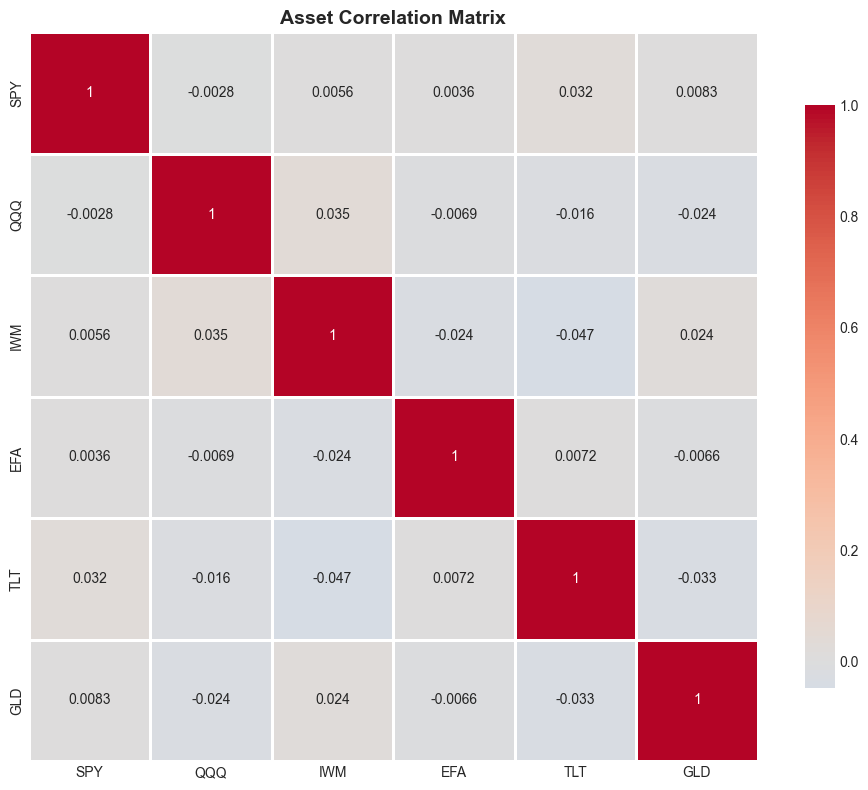

In [6]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Asset Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
from scipy.optimize import minimize

def portfolio_stats(weights, mean_returns, cov_matrix):
    """Calculate portfolio return and volatility"""
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std

def negative_sharpe(weights, mean_returns, cov_matrix, risk_free_rate=0.02):
    """Negative Sharpe ratio (we minimize this to maximize Sharpe)"""
    p_return, p_std = portfolio_stats(weights, mean_returns, cov_matrix)
    sharpe = (p_return - risk_free_rate) / p_std
    return -sharpe

# Constraints and bounds
num_assets = len(mean_returns)
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(num_assets))  # Long-only (no shorting)

# Initial guess (equal weight)
init_guess = num_assets * [1. / num_assets]

# Optimize!
print("Optimizing portfolio to maximize Sharpe ratio...")
result = minimize(negative_sharpe, init_guess, args=(mean_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = result.x
print("\nOptimization successful!" if result.success else "\nOptimization failed!")
print(f"\nOptimal Weights:")
for ticker, weight in zip(data.columns, optimal_weights):
    print(f"  {ticker}: {weight*100:.2f}%")

# Calculate portfolio stats
opt_return, opt_std = portfolio_stats(optimal_weights, mean_returns, cov_matrix)
opt_sharpe = (opt_return - 0.02) / opt_std

print(f"\nOptimal Portfolio Performance:")
print(f"  Expected Return: {opt_return*100:.2f}%")
print(f"  Volatility (Std): {opt_std*100:.2f}%")
print(f"  Sharpe Ratio: {opt_sharpe:.3f}")

Optimizing portfolio to maximize Sharpe ratio...

Optimization successful!

Optimal Weights:
  SPY: 52.78%
  QQQ: 38.43%
  IWM: 6.66%
  EFA: 0.00%
  TLT: 0.00%
  GLD: 2.13%

Optimal Portfolio Performance:
  Expected Return: 23.80%
  Volatility (Std): 12.72%
  Sharpe Ratio: 1.715


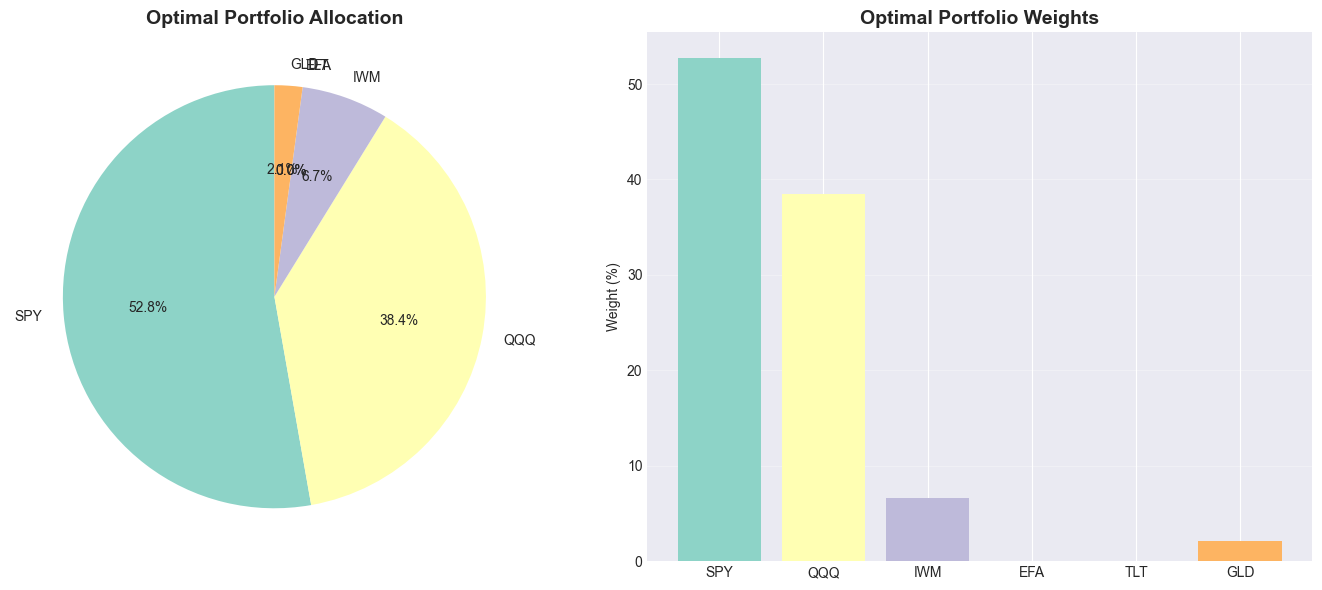

In [8]:
# Visualize optimal portfolio weights
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = plt.cm.Set3(range(len(optimal_weights)))
ax1.pie(optimal_weights, labels=data.columns, autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax1.set_title('Optimal Portfolio Allocation', fontsize=14, fontweight='bold')

# Bar chart
ax2.bar(data.columns, optimal_weights * 100, color=colors)
ax2.set_ylabel('Weight (%)')
ax2.set_title('Optimal Portfolio Weights', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [9]:
# Generate random portfolios to plot efficient frontier
np.random.seed(42)
num_portfolios = 10000

# Store results
results = np.zeros((3, num_portfolios))  # return, std, sharpe

for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)  # Normalize to sum to 1
    
    # Calculate portfolio stats
    portfolio_return, portfolio_std = portfolio_stats(weights, mean_returns, cov_matrix)
    sharpe = (portfolio_return - 0.02) / portfolio_std
    
    # Store results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe

print(f"Generated {num_portfolios:,} random portfolios")
print(f"Return range: {results[0].min()*100:.2f}% to {results[0].max()*100:.2f}%")
print(f"Risk range: {results[1].min()*100:.2f}% to {results[1].max()*100:.2f}%")
print(f"Sharpe range: {results[2].min():.3f} to {results[2].max():.3f}")

Generated 10,000 random portfolios
Return range: -1.24% to 23.17%
Risk range: 7.06% to 17.58%
Sharpe range: -0.329 to 1.706


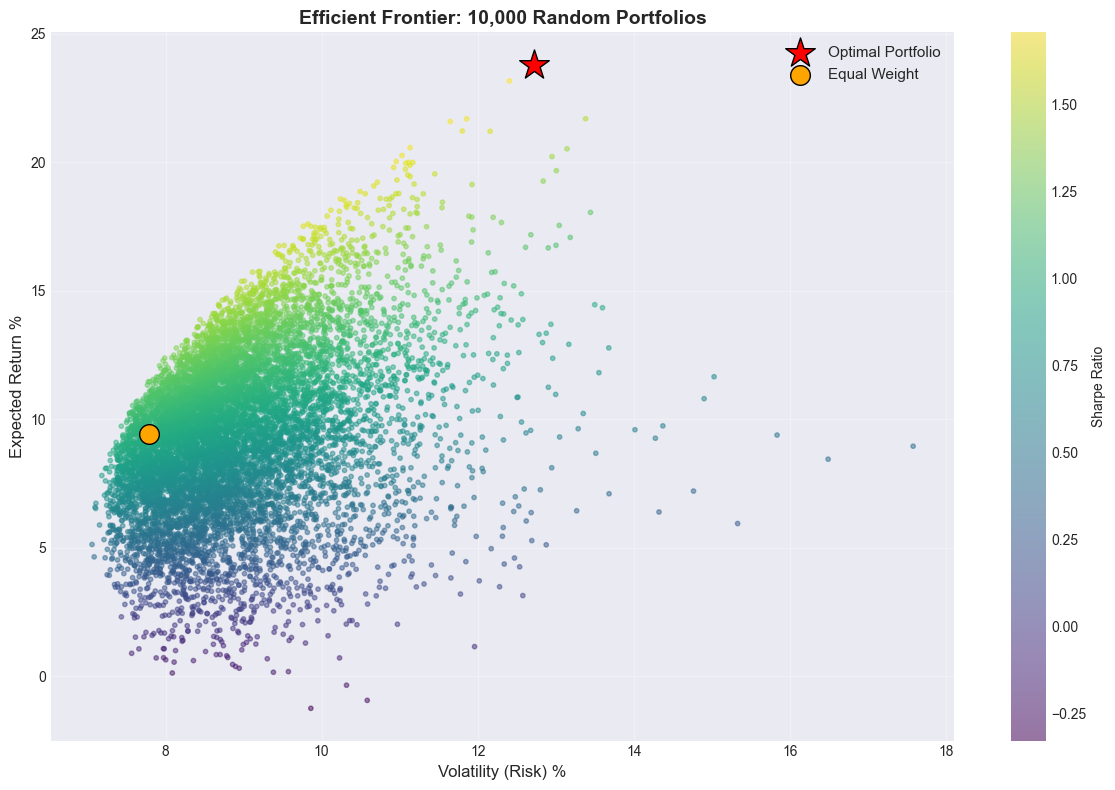


Optimal Portfolio: 23.80% return, 12.72% risk
Equal Weight Portfolio: 9.43% return, 7.79% risk


In [10]:
# Plot efficient frontier
plt.figure(figsize=(12, 8))

# Scatter plot of all portfolios, colored by Sharpe ratio
scatter = plt.scatter(results[1,:]*100, results[0,:]*100, 
                     c=results[2,:], cmap='viridis', alpha=0.5, s=10)
plt.colorbar(scatter, label='Sharpe Ratio')

# Mark the optimal portfolio with a red star
plt.scatter(opt_std*100, opt_return*100, marker='*', color='red', s=500, 
           edgecolors='black', label='Optimal Portfolio', zorder=5)

# Mark equal-weight portfolio for comparison
equal_weights = np.array([1/num_assets] * num_assets)
eq_return, eq_std = portfolio_stats(equal_weights, mean_returns, cov_matrix)
plt.scatter(eq_std*100, eq_return*100, marker='o', color='orange', s=200,
           edgecolors='black', label='Equal Weight', zorder=5)

plt.xlabel('Volatility (Risk) %', fontsize=12)
plt.ylabel('Expected Return %', fontsize=12)
plt.title('Efficient Frontier: 10,000 Random Portfolios', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nOptimal Portfolio: {opt_return*100:.2f}% return, {opt_std*100:.2f}% risk")
print(f"Equal Weight Portfolio: {eq_return*100:.2f}% return, {eq_std*100:.2f}% risk")

In [11]:
# Split data into training and testing periods
split_date = '2022-01-01'

train_data = data[data.index < split_date]
train_returns = returns[returns.index < split_date]

test_data = data[data.index >= split_date]
test_returns = returns[returns.index >= split_date]

train_mean_returns = train_returns.mean() * 252
train_cov_matrix = train_returns.cov() * 252

print("Data Split:")
print(f"Training: {len(train_data)} days")
print(f"Testing: {len(test_data)} days")
print("\nTraining Mean Returns (%):")
print((train_mean_returns * 100).round(2))

Data Split:
Training: 784 days
Testing: 521 days

Training Mean Returns (%):
SPY    10.54
QQQ    29.85
IWM    11.82
EFA    -5.63
TLT    -9.95
GLD     0.39
dtype: float64


In [12]:
# Optimize portfolio using ONLY training data
print("Optimizing on training data (2019-2021)...")

# Use same optimization setup as before
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(num_assets))
init_guess = num_assets * [1. / num_assets]

# Optimize using training period statistics
train_result = minimize(negative_sharpe, init_guess, 
                       args=(train_mean_returns, train_cov_matrix),
                       method='SLSQP', bounds=bounds, constraints=constraints)

train_optimal_weights = train_result.x

print("\nOptimal Weights (trained on 2019-2021):")
for ticker, weight in zip(data.columns, train_optimal_weights):
    print(f"  {ticker}: {weight*100:.2f}%")

# Calculate expected performance on training data
train_port_return, train_port_std = portfolio_stats(train_optimal_weights, 
                                                     train_mean_returns, train_cov_matrix)
train_sharpe = (train_port_return - 0.02) / train_port_std

print(f"\nExpected Performance (based on training):")
print(f"  Return: {train_port_return*100:.2f}%")
print(f"  Risk: {train_port_std*100:.2f}%")
print(f"  Sharpe: {train_sharpe:.3f}")

Optimizing on training data (2019-2021)...

Optimal Weights (trained on 2019-2021):
  SPY: 27.94%
  QQQ: 57.94%
  IWM: 14.12%
  EFA: 0.00%
  TLT: 0.00%
  GLD: 0.00%

Expected Performance (based on training):
  Return: 21.91%
  Risk: 14.03%
  Sharpe: 1.419


In [13]:
# Test the portfolio on unseen data (2022-2024)
print("Testing portfolio on out-of-sample period (2022-2024)...\n")

# Apply the trained weights to test period returns
test_portfolio_returns = (test_returns * train_optimal_weights).sum(axis=1)

# Also calculate equal-weight benchmark
equal_weights = np.array([1/num_assets] * num_assets)
test_equal_returns = (test_returns * equal_weights).sum(axis=1)

# Calculate cumulative returns
opt_cumulative = (1 + test_portfolio_returns).cumprod()
eq_cumulative = (1 + test_equal_returns).cumprod()

# Calculate performance metrics
opt_total_return = opt_cumulative.iloc[-1] - 1
eq_total_return = eq_cumulative.iloc[-1] - 1

opt_annual_return = test_portfolio_returns.mean() * 252
eq_annual_return = test_equal_returns.mean() * 252

opt_annual_vol = test_portfolio_returns.std() * np.sqrt(252)
eq_annual_vol = test_equal_returns.std() * np.sqrt(252)

opt_sharpe = (opt_annual_return - 0.02) / opt_annual_vol
eq_sharpe = (eq_annual_return - 0.02) / eq_annual_vol

# Print results
print("OUT-OF-SAMPLE PERFORMANCE (2022-2024):")
print("\nOptimized Portfolio:")
print(f"  Total Return: {opt_total_return*100:.2f}%")
print(f"  Annual Return: {opt_annual_return*100:.2f}%")
print(f"  Annual Volatility: {opt_annual_vol*100:.2f}%")
print(f"  Sharpe Ratio: {opt_sharpe:.3f}")

print("\nEqual Weight Benchmark:")
print(f"  Total Return: {eq_total_return*100:.2f}%")
print(f"  Annual Return: {eq_annual_return*100:.2f}%")
print(f"  Annual Volatility: {eq_annual_vol*100:.2f}%")
print(f"  Sharpe Ratio: {eq_sharpe:.3f}")

print("\n" + "="*50)
if opt_sharpe > eq_sharpe:
    print("✓ Optimized portfolio BEAT equal weight!")
else:
    print("✗ Optimized portfolio LOST to equal weight")

Testing portfolio on out-of-sample period (2022-2024)...

OUT-OF-SAMPLE PERFORMANCE (2022-2024):

Optimized Portfolio:
  Total Return: 66.94%
  Annual Return: 25.80%
  Annual Volatility: 14.17%
  Sharpe Ratio: 1.679

Equal Weight Benchmark:
  Total Return: 33.66%
  Annual Return: 14.33%
  Annual Volatility: 7.62%
  Sharpe Ratio: 1.617

✓ Optimized portfolio BEAT equal weight!


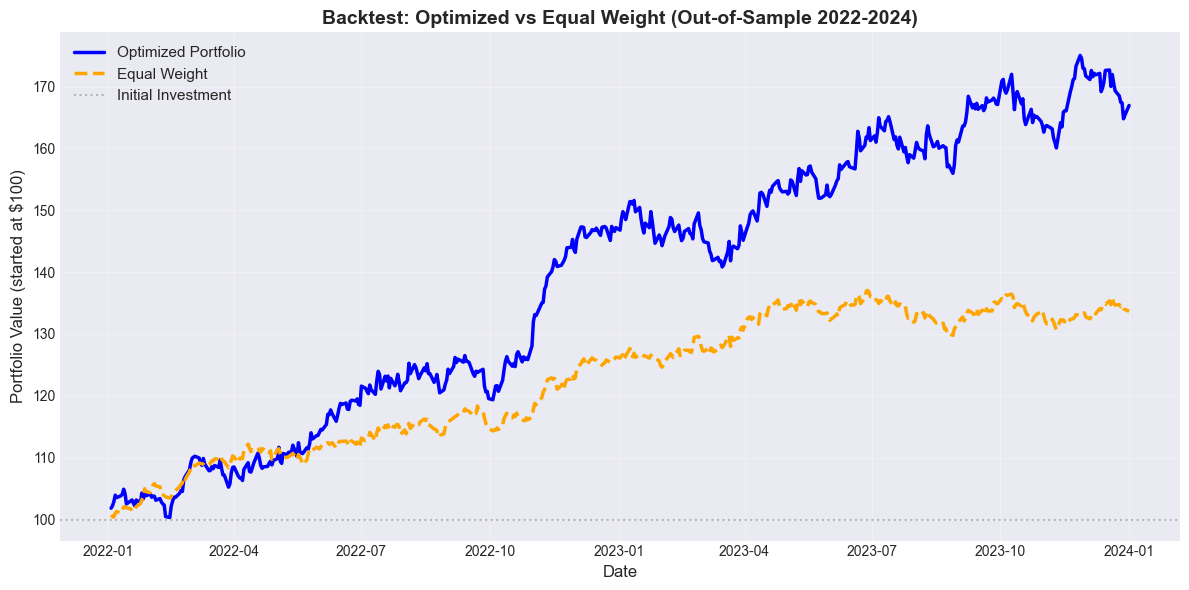


Final Values:
  Optimized: $166.94
  Equal Weight: $133.66
  Difference: $33.28


In [14]:
# Plot cumulative returns comparison
plt.figure(figsize=(12, 6))
plt.plot(opt_cumulative.index, opt_cumulative * 100, 
         label='Optimized Portfolio', linewidth=2.5, color='blue')
plt.plot(eq_cumulative.index, eq_cumulative * 100, 
         label='Equal Weight', linewidth=2.5, color='orange', linestyle='--')

plt.axhline(y=100, color='gray', linestyle=':', alpha=0.5, label='Initial Investment')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value (started at $100)', fontsize=12)
plt.title('Backtest: Optimized vs Equal Weight (Out-of-Sample 2022-2024)', 
          fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nFinal Values:")
print(f"  Optimized: ${opt_cumulative.iloc[-1]*100:.2f}")
print(f"  Equal Weight: ${eq_cumulative.iloc[-1]*100:.2f}")
print(f"  Difference: ${(opt_cumulative.iloc[-1] - eq_cumulative.iloc[-1])*100:.2f}")